# Alpha study

## Comparacion de alpha linear y alpha exp

In [22]:
import numpy as np
import matplotlib.pyplot as plt

### Valores de X

In [23]:
min_slots = 205
max_slots = 305

x = np.arange(max_slots-min_slots) + min_slots

In [24]:
x

array([205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299, 300, 301, 302, 303, 304])

### Valores de Y función exponencial

In [25]:
def exp(capacity_slots, a):
    return (capacity_slots-min_slots)**a / max_slots

In [40]:
y_exp = np.array([])
y = np.array([])
alpha_values_exp = np.array([2.0,2.2,2.4,2.6,2.8,3.0])
for a in alpha_values_exp:
    for i in x:
        y = np.append(y, exp(i, a)) # Agregamos los nuevo valores a la lista

    # Una vez guardado todos los valores para un alpha, los guardamos en la lista general
    if len(y_exp) != 0:
        y_exp = np.append(y_exp, [y.copy()], axis=0)
    else:
        y_exp = np.array([y])
    y = np.array([]) # Reseteamos y

In [27]:
y_linear = np.array([])
y = np.array([])
alpha_values_linear = np.array([1.2,1.6,2,2.4,2.8,3.2])
for a in alpha_values_linear:
    for i in x:
        y = np.append(y, a*i) # Agregamos los nuevo valores a la lista
        
    # Una vez guardado todos los valores para un alpha, los guardamos en la lista general
    if len(y_linear) != 0:
        y_linear = np.append(y_linear, [y.copy()], axis=0)
    else:
        y_linear = np.array([y])
    y = np.array([]) # Reseteamos y

In [41]:
y = np.append(y_exp, y_linear, axis=0)

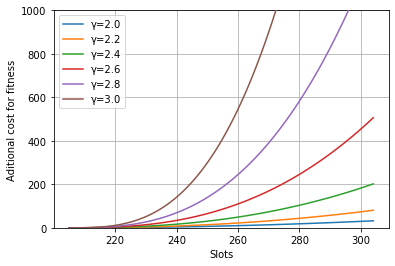

In [43]:
n_y,n_x = y.shape
n_y_exp, n_x_exp = y_exp.shape
n_y_linear, n_x_linear = y_linear.shape
legend = []

ax = plt.figure()
ax.set_facecolor('white')

'''
for i in range(0, n_y):
    plt.plot(x,y[i])
    
    if i > n_y_exp: # Aniadimos primero las y exponenciales a la leyenda
        legend = legend + ["γ="+str(alpha_values_exp[i])]
    else:
        legend = legend + ["α="+str(alpha_values_linear[i])]
'''

for i in range(0,n_y_exp):
    plt.plot(x,y_exp[i], zorder=3)
    legend = legend + ["γ="+str(alpha_values_exp[i])]
#plt.title("Alpha study")
plt.xlabel("Slots")
plt.ylabel("Aditional cost for fitness")
plt.grid(zorder=0)
plt.ylim((0,1000))
plt.legend(legend)
plt.savefig('./study/alpha/alpha_exp_study.png', dpi=100)
plt.show()

## Lectura de datos de Alpha

In [5]:
def string_number_list_to_list(s):
    l = s.strip('][').split(' ')
    number_list = np.array([])
    for n in l:
        if n != "":
            number_list = np.append(number_list,float(n))
    return number_list

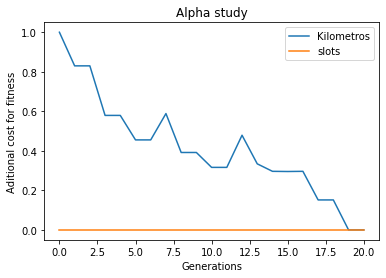

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'alpha_study_linear'
alpha_df = pd.read_csv('./study/alpha/'+name_file+'.csv')
alpha_m = alpha_df.to_numpy()


kms_history = string_number_list_to_list(alpha_m[0][2])
n_kms_history = normalizedlist=scaler.fit_transform(kms_history.reshape(-1,1)) # Debemos poner reshape(-1,1) para que lo lea
slots_history = string_number_list_to_list(alpha_m[0][3])
n_slots_history = normalizedlist=scaler.fit_transform(slots_history.reshape(-1,1))
best_kms = alpha_m[0][4]
best_kms_slots = alpha_m[0][5]

x = np.arange(len(kms_history))

# PLOT
ax = plt.figure()
ax.set_facecolor('white')


plt.plot(x, n_kms_history)
plt.plot(x, n_slots_history)
legend = ['Kilometros','slots']
plt.title("Alpha study")
plt.xlabel("Generations")
plt.ylabel("Aditional cost for fitness")
plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.savefig('./study/alpha/alpha_study.png', dpi=150)
plt.show()


## Alpha linear

[109.1036 123.49   140.1074 140.902  148.0532 182.4834]
[282.8 275.6 267.2 266.6 264.4 256.8]
['α=1.2' 'α=1.6' 'α=2.0' 'α=2.4' 'α=2.8' 'α=3.2']


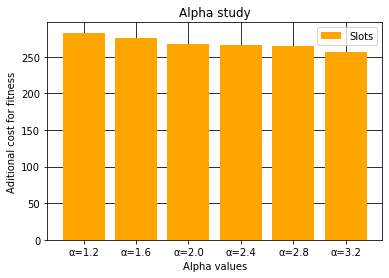

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'alpha_study_linear'
alpha_df = pd.read_csv('./study/alpha/'+name_file+'.csv')

#[1.2,1.6,2.0,2.4,2.8,3.2]
#exp[2.0,2.2,2.4,2.6,2.8,3.0]
alphas = [1.2,1.6,2.0,2.4,2.8,3.2]
means_kms = np.array([])
means_slots = np.array([])
x = np.array([])

for a in alphas:
    select = alpha_df[alpha_df['alpha'] == a].to_numpy()
    km = np.array([])
    slots = np.array([])
    for i in range(0,5):
        km = np.append(km, float(select[i][3]))
        slots = np.append(slots, float(select[i][4]))
        
    means_kms = np.append(means_kms, km.mean())
    means_slots = np.append(means_slots, slots.mean())
    x = np.append(x, f"α={a}")

print(means_kms)
print(means_slots)
print(x)



# PLOT
ax = plt.figure()
ax.set_facecolor('white')


#plt.bar(x, means_kms, zorder=3)
plt.bar(x, means_slots, color='orange', zorder=3)
legend = ['Slots']
plt.title("Alpha study")
plt.xlabel("Alpha values")
plt.ylabel("Aditional cost for fitness")
plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/alpha/alpha_study_linear_slots.png', dpi=150)
plt.show()

## Alpha exp

[109.1036 123.49   140.1074 140.902  148.0532 182.4834]
[282.8 275.6 267.2 266.6 264.4 256.8]
['α=1.2' 'α=1.6' 'α=2.0' 'α=2.4' 'α=2.8' 'α=3.2']


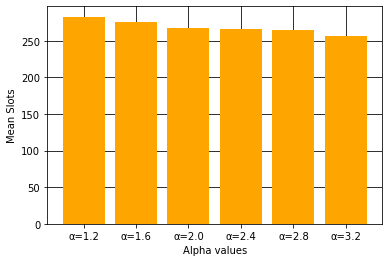

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'alpha_study_linear'
alpha_df = pd.read_csv('./study/alpha/'+name_file+'.csv')

#[1.2,1.6,2.0,2.4,2.8,3.2]
#exp[2.0,2.2,2.4,2.6,2.8,3.0]
alphas = [1.2,1.6,2.0,2.4,2.8,3.2]
means_kms = np.array([])
means_slots = np.array([])
x = np.array([])

for a in alphas:
    select = alpha_df[alpha_df['alpha'] == a].to_numpy()
    km = np.array([])
    slots = np.array([])
    for i in range(0,5):
        km = np.append(km, float(select[i][3]))
        slots = np.append(slots, float(select[i][4]))
        
    means_kms = np.append(means_kms, km.mean())
    means_slots = np.append(means_slots, slots.mean())
    x = np.append(x, f"α={a}")

print(means_kms)
print(means_slots)
print(x)



# PLOT
ax = plt.figure()
ax.set_facecolor('white')


#plt.bar(x, means_kms, zorder=3)
plt.bar(x, means_slots, color='orange', zorder=3)
legend = ['Slots']
#plt.title("Alpha study")
plt.xlabel("Alpha values")
plt.ylabel("Mean Slots")
#plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/alpha/alpha_study_linear_slots.png', dpi=150)
plt.show()

# Algotritmo genético básic

In [1]:
def string_number_list_to_list(s):
    l = s.strip('[]').split(' ')
    number_list = np.array([])
    for n in l:
        if n != "":
            number_list = np.append(number_list,float(n))
    return number_list

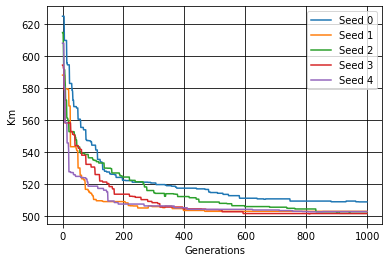

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'population_convergence_study'
alpha_df = pd.read_csv('./study/basic_genetic/'+name_file+'.csv')

sizes = [30] #[16,24,30]
x = np.array([])
y = np.array([])
legend = []
for s in sizes:
    select = alpha_df[alpha_df['population'] == s].to_numpy()
    
    for i in range(0,5):
        aux = select[i][2]
        #print(type(aux))
        l = string_number_list_to_list(aux)
        if len(y) != 0:
            y = np.append(y, [l], axis=0)
        else:
            y = np.array([l])
        
        legend = legend + [f"Seed {i}"]
    
    

x = np.arange(len(y[0]))

# PLOT
ax = plt.figure()
ax.set_facecolor('white')

plt.plot(x,y[0])
plt.plot(x,y[1])
plt.plot(x,y[2])
plt.plot(x,y[3])                           
plt.plot(x,y[4])
                           
#plt.title("Alpha study")
plt.xlabel("Generations")
plt.ylabel("Km")
plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/basic_genetic/population'+str(sizes[0])+'_generations.png', dpi=100)
plt.show()

# Algoritmo CHC

In [2]:
def string_number_list_to_list(s):
    l = s.strip('[]').split(' ')
    number_list = np.array([])
    for n in l:
        if n != "":
            number_list = np.append(number_list,float(n))
    return number_list

['r=4', 'r=6', 'r=8', 'r=10', 'r=12', 'r=14']
[ 0.   0.6  1.6  2.   6.6 10. ]


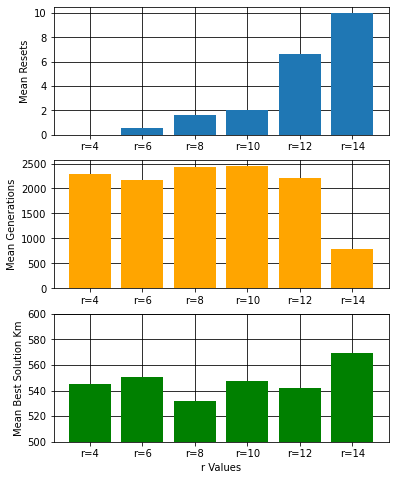

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'chc_radius_study'
alpha_df = pd.read_csv('./study/chc/'+name_file+'.csv')

radius = [4,6,8,10,12,14] #[16,24,30]
x = []
n_resets_mean = np.array([])
n_generations_mean = np.array([])
kms_means = np.array([])

legend = []
for r in radius:
    select = alpha_df[alpha_df['radius'] == r].to_numpy()
    resets = np.array([])
    generations = np.array([])
    kms = np.array([])
    for i in range(0,5):
        resets = np.append(resets, int(select[i][2]))
        generations = np.append(generations, int(select[i][6]))
        kms = np.append(kms, float(select[i][4]))
        
    n_resets_mean=np.append(n_resets_mean, resets.mean())
    n_generations_mean = np.append(n_generations_mean, generations.mean())
    kms_means = np.append(kms_means, kms.mean())
    #legend = legend + [f"r={r}"]
    x = x + [f"r={r}"]

print(x)
print(n_resets_mean)
    
# PLOT
ax = plt.figure(figsize=(6,8))
ax.set_facecolor('white')

# Primer subplot
plt.subplot(3,1,1)
plt.bar(x,n_resets_mean, zorder=3)
#plt.xlabel("r Values")
plt.ylabel("Mean Resets")
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)

# Segundo subplot
plt.subplot(3,1,2)
plt.bar(x,n_generations_mean, color='orange', zorder=3)
#plt.xlabel("r Values")
plt.ylabel("Mean Generations")
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)

# Tercer subplot
plt.subplot(3,1,3)
plt.bar(x,kms_means, color='green', zorder=3)
plt.xlabel("r Values")
plt.ylabel("Mean Best Solution Km")
plt.ylim((500,600))
#plt.title("Alpha study")
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)

# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''

plt.savefig('./study/chc/chc_radius_study.png', dpi=100)
plt.show()

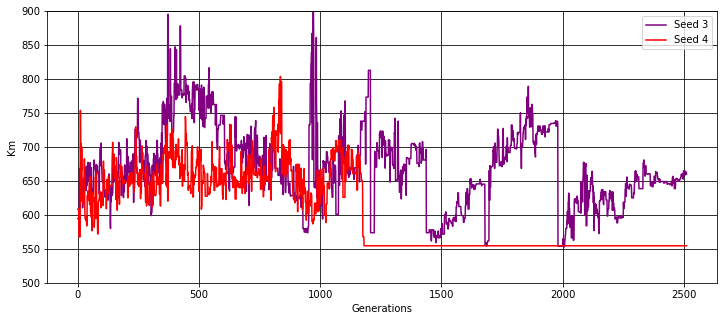

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

radius = 12
name_file = 'chc_radius_'+str(radius)+'_study'
alpha_df = pd.read_csv('./study/chc/'+name_file+'.csv')

seeds = [56428042,27886648,173386297,78746995,95206404] #[16,24,30]

x = np.array([])
y = np.array([])
legend = []
i=0
max_size = 0

# Primero miramos que semilla ha realizado mas generaciones
for r in seeds:
    select = alpha_df[alpha_df['seed'] == r]
    aux = select['kms_history'].to_list()
    if len(aux)>max_size:
        max_size = len(aux)

for r in seeds:
    select = alpha_df[alpha_df['seed'] == r]

    aux = select['kms_history'].to_list()
    
    if len(y) != 0:
        s = len(aux)
        for j in range(s,max_size):
            aux = np.append(aux, aux[s-1])

        y = np.append(y, [aux], axis=0)
    else:
        s = len(aux)
        for j in range(s,max_size):
            aux = np.append(aux, aux[s-1])
        y = np.array([aux])

    legend = legend + [f"Seed {i}"]
    i += 1
    


x = np.arange(max_size)
#legend = ["Seed 0","Seed 1", "Seed 2"]
legend = ["Seed 3","Seed 4"]
#legend = ["Seed 0","Seed 1", "Seed 2","Seed 3","Seed 4"]
#
# PLOT
ax = plt.figure(figsize=(12,5))
ax.set_facecolor('white')

#plt.plot(x,y[0])
#plt.plot(x,y[1])
#plt.plot(x,y[2])
plt.plot(x,y[3], color='purple')                           
plt.plot(x,y[4], color='red')
                           
#plt.title("Alpha study")
plt.xlabel("Generations")
plt.ylabel("Km")
plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
y_min = 500
y_max = 900
plt.ylim(y_min,y_max)

plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/chc/'+name_file+'.png', dpi=100)
plt.show()

# VNS

['bl=20' 'bl=40' 'bl=60' 'bl=80' 'bl=100']
[604.231  600.3928 598.7254 598.2086 598.2086]


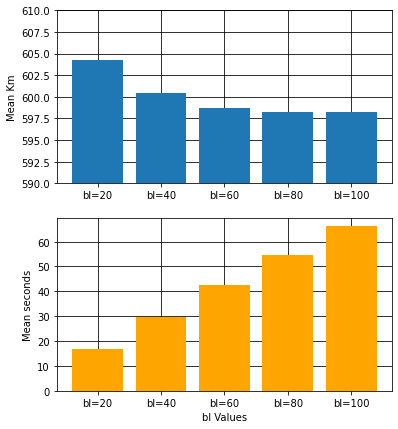

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'max_bl_study'
alpha_df = pd.read_csv('./study/vns/'+name_file+'.csv')

n_bl = [20,40,60,80,100]
means_kms = np.array([])
means_time = np.array([])
x = np.array([])

for bl in n_bl:
    select = alpha_df[alpha_df['n_bl'] == bl]
    
    aux = np.array(select['best_kms'].to_list())
    means_kms = np.append(means_kms, aux.mean())
    
    aux = np.array(select['time'].to_list())
    means_time = np.append(means_time, aux.mean())
    
    x = np.append(x, f"bl={bl}")

print(x)    
print(means_kms)


# PLOT
ax = plt.figure(figsize=(6,7))
ax.set_facecolor('white')

plt.subplot(2,1,1)
plt.bar(x, means_kms, zorder=3)
plt.ylabel("Mean Km")
plt.ylim((590,610))
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
#legend = ['Slots']

plt.subplot(2,1,2)
plt.bar(x, means_time, color='orange', zorder=3)
plt.ylabel("Mean seconds")
plt.xlabel("bl Values")


#plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/vns/max_bl_study.png', dpi=100)
plt.show()

# Multimodal

In [2]:
def string_number_list_to_list(s):
    aux = str(s)
    string_cut = aux.strip('][').split(' ')
    number_list = np.array([])
    for n in string_cut:
        if n != "":
            number_list = np.append(number_list,float(n))
    return number_list

In [3]:
def g(x, niche_solution, radius, radius_share, beta):
    """
    La funcion g calcula un valor de castigo para la solucion x en funcion de como de cerca se encuentre de la solucion nicho. Si la solucion esta en el radio de la 
    solucion nicho, recibira un castigo en funcion de como de cerca este. En caso contrario no se aplicara ningun castigo
    
    Parametros
        x : Numpy ndarray
            Vector solucion
        s : Numpy ndarray
            Vector solucion
        radius : int
            Indica cual es el numero de slots minimo para que dos genes sean considerados como iguales (gen=estacion)
        radius_share : int
            Indica cual es el radio de accion de un nicho. Es decir, si la distancia entre x y s es de 10 genes de diferencia(hay 10 genes que son considerados 
            diferentes, esto depende de radius) y la radius_share es igual a 8. No se aplicaria penalizacion porque esta fuera del rango de la solucion nicho. Sin
            embargo, si la distancia entre ambas fuera de 5 genes de diferencia. Al estar dentro del radio del nicho, se le aplicaria un castigo
        beta : float
            Valor para aumentar de forma exponencial el castigo aplicado. Si el valor es igual a 1, el castigo aplicado sera lineal en funcion de la cercania al nicho
            . Si aumentamos beta, el castigo se realizara de forma exponencial. Contra mas nos acerquemos a la solucion nicho, mas se castigara a nuestra solucion
    Return
        Devuelve un valor entre 0-1. Este numero debera ser multiplicado por el fitness obtenido por la solucion x. De este forma, si x estaba fuera del rango de la 
        solucion nicho, g() devolvera 1. Conservando el valor total del resultado obtenido (fitness = fitness * 1). A medida que se acerque,
    """
    value = 0 # Solucion por defecto, siempre que d < radius. De esta forma, si la solucion esta lejos del nicho. No recibira ningun castigo
    d = hamming_distance(x, niche_solution, radius)

    if d < radius_share:
        value = 1 - (d / radius_share)**beta
        
    return value

In [4]:
def hamming_distance(x, s, radius):
    """
    Calcula la distancia a la que se encuentra la solucion x de la solucion s
    
    Parametros
        x : Numpy ndarray
            Vector solucion
        s : Numpy ndarray
            Vector solucion
        radius : int
            Indica cual es el numero de slots minimo para que dos genes sean considerados como iguales (gen=estacion)
            
    Return
        Devuelve la distancia a la que se encuentra
    """

    # Restamos cada par de genotipos y calculamos su valor absoluto. Despues, comprobamos si estan dentro del radio
    subtraction = np.absolute(x - s)
    # Comprobamos que genotipos son diferentes. Para serlo, su resta debe superar el tamanio del radio
    distance = sum(subtraction >= radius)
    
    return distance

In [58]:
# estos valores se encuentran a la variable niches del archivo csv
niches_solutions = np.array([
[[13,13,15,14,18,14,13,11,8,14,13,18,8,13,15,15] ,[10,9,15,14,17,14,14,10,8,19,16,19,8,13,15,14] ,[11,9,17,14,17,14,12,9,12,13,15,19,8,13,15,17] ,[12,9,14,15,20,14,12,12,12,14,12,19,8,13,15,14] ,[12,9,14,14,20,14,13,9,12,14,14,19,9,13,15,14]],
[[14,9,17,14,16,14,13,9,12,14,14,19,8,13,15,14] ,[10,10,20,14,19,14,13,10,12,12,13,18,8,13,15,14] ,[8,8,21,14,14,14,13,14,8,12,16,21,8,13,15,16] ,[14,10,15,14,20,14,13,11,8,12,13,18,8,13,15,17] ,[18,8,14,14,18,14,12,9,12,12,12,22,8,13,15,14]],
[[12,10,20,14,18,14,12,12,8,13,14,18,8,13,15,14] ,[12,10,13,12,20,14,12,12,12,16,12,18,8,13,15,16] ,[12,9,13,14,20,14,13,16,8,14,12,19,8,13,15,15] ,[10,10,16,14,18,13,14,10,12,14,14,18,8,13,15,16] ,[14,9,14,14,20,14,12,13,8,13,12,20,8,13,15,16]],
[[15,9,13,15,20,13,12,12,8,11,12,19,11,13,15,17] ,[11,9,15,14,20,14,12,9,12,16,14,19,8,13,15,14] ,[10,10,19,15,19,14,12,11,12,11,14,18,8,13,15,14] ,[16,9,18,14,19,14,12,10,8,13,13,19,8,13,15,14] ,[13,9,16,15,14,14,14,9,8,12,16,19,11,13,15,17]],
[[10,9,19,14,16,15,14,10,8,14,16,19,9,13,15,14] ,[12,8,17,14,16,14,12,9,12,15,14,22,8,13,15,14] ,[15,9,15,14,20,14,12,11,8,13,15,19,8,13,15,14] ,[13,8,15,14,20,14,12,12,12,14,11,20,8,13,15,14] ,[12,8,20,14,15,14,12,9,12,13,15,21,8,13,15,14]],
[[10,9,20,15,17,14,13,10,12,11,15,19,8,13,15,14] ,[10,9,15,14,15,16,14,11,8,20,14,19,8,13,15,14] ,[11,9,15,14,20,14,12,10,12,15,14,19,8,13,15,14] ,[12,9,14,16,20,14,12,11,8,12,13,24,8,13,15,14] ,[11,10,16,16,17,14,14,9,12,12,15,18,8,13,15,15]],
[[11,11,15,14,17,14,12,9,12,16,15,18,9,13,15,14] ,[13,7,18,16,20,13,12,12,12,10,10,21,8,13,15,14] ,[11,9,14,14,16,14,13,9,12,14,16,19,8,13,15,18] ,[10,9,14,14,20,14,13,11,12,16,13,19,8,13,15,14] ,[12,10,14,14,20,14,12,9,12,16,14,18,8,13,15,14]],
[[15,8,16,14,20,14,12,12,8,12,12,21,8,13,15,15] ,[13,7,13,14,19,14,12,12,12,15,11,22,8,13,15,14] ,[10,10,15,16,16,14,14,10,8,12,16,24,8,13,15,14] ,[10,10,17,14,17,14,16,10,12,13,14,18,8,13,15,14] ,[17,9,17,14,17,14,13,13,8,12,12,19,8,13,15,14]],
[[11,8,15,14,16,16,12,9,8,14,15,26,8,13,15,15] ,[13,8,15,15,20,14,12,11,12,11,12,22,8,13,15,14] ,[15,8,14,14,20,14,13,10,8,13,16,20,8,13,15,14] ,[12,10,18,14,19,13,12,9,12,14,14,18,8,13,15,14] ,[14,8,13,14,20,14,14,9,8,15,13,23,8,13,15,14]],
[[10,9,17,14,18,15,14,12,12,13,12,19,8,13,15,14] ,[12,8,14,14,20,14,12,12,12,14,12,21,8,13,15,14] ,[11,8,15,14,19,14,13,9,12,12,14,23,9,13,15,14] ,[11,8,16,14,18,14,12,9,12,16,14,21,8,13,15,14] ,[11,9,16,14,19,16,14,9,12,12,14,19,8,13,15,14]],
[[10,9,18,14,14,14,14,16,8,13,12,19,11,13,15,15] ,[11,10,16,17,17,15,13,9,12,12,15,18,8,13,15,14] ,[12,9,15,14,19,13,13,9,12,17,13,19,8,13,15,14] ,[14,8,16,15,20,14,12,12,12,11,10,21,8,13,15,14] ,[10,8,18,14,17,14,12,10,12,14,14,22,8,13,15,14]],
[[10,8,17,14,15,14,15,13,8,13,12,22,12,13,15,14] ,[10,8,17,14,19,14,13,11,12,13,13,20,9,13,15,14] ,[11,9,15,14,20,14,14,10,12,13,14,19,8,13,15,14] ,[12,10,15,13,20,14,12,11,8,18,13,18,9,13,15,14] ,[14,9,16,14,16,14,13,9,12,12,14,19,8,13,15,17]],
[[11,8,16,14,17,14,15,9,12,12,14,23,8,13,15,14] ,[13,8,13,14,20,14,12,12,12,14,11,22,8,13,15,14] ,[12,9,14,14,16,14,12,9,12,13,14,19,14,13,15,14] ,[9,9,18,13,15,13,14,12,12,15,15,19,8,13,15,15] ,[11,8,16,14,20,14,12,9,8,16,13,24,8,13,15,14]],
[[13,9,14,16,20,14,13,12,8,12,14,19,8,13,15,15] ,[12,8,15,14,18,14,12,9,12,15,14,22,8,13,15,14] ,[16,9,14,14,19,14,12,12,8,15,12,19,8,13,15,15] ,[12,9,16,14,17,14,13,10,12,12,14,19,8,13,15,17] ,[12,10,20,15,16,14,12,9,8,11,18,18,9,13,15,15]],
[[9,10,18,14,16,14,17,11,8,13,13,18,11,13,15,15] ,[12,9,14,14,15,14,14,9,8,18,14,19,8,13,15,19] ,[13,9,18,14,20,16,12,11,8,12,13,19,8,13,15,14] ,[12,9,16,14,18,14,12,14,12,13,12,19,8,13,15,14] ,[12,9,19,14,17,14,13,12,12,12,12,19,8,13,15,14]],
[[14,9,18,14,20,14,12,11,8,12,13,19,9,13,15,14] ,[9,8,20,14,15,14,12,13,8,12,16,22,8,13,15,16] ,[10,8,16,14,19,13,14,10,12,14,13,22,8,13,15,14] ,[11,8,20,16,18,13,12,11,12,11,13,20,8,13,15,14] ,[10,9,17,14,16,14,17,10,8,16,13,19,8,13,15,16]],
[[12,8,19,15,16,14,12,11,12,11,13,22,8,13,15,14] ,[10,9,21,15,16,14,14,11,8,13,13,19,8,13,15,16] ,[12,8,18,15,17,14,13,10,12,11,14,21,8,13,15,14] ,[16,9,15,14,20,14,13,12,8,13,12,19,8,13,15,14] ,[14,8,16,14,20,13,12,12,12,12,10,21,8,13,15,15]],
[[11,10,18,12,16,14,14,9,8,17,16,18,8,13,15,16] ,[11,9,19,14,14,14,16,11,8,16,14,19,8,13,15,14] ,[14,10,18,17,14,14,14,9,8,12,16,18,8,13,15,15] ,[10,9,19,15,18,14,14,10,12,11,14,19,8,13,15,14] ,[15,9,13,15,19,14,12,12,8,12,12,18,12,13,15,16]],
[[13,10,13,16,19,14,15,12,8,11,12,18,8,13,15,18] ,[11,8,16,14,20,14,12,11,12,13,13,21,8,13,15,14] ,[16,8,14,15,20,14,13,12,8,11,12,22,8,13,15,14] ,[10,10,16,15,18,14,14,10,12,11,14,18,8,13,15,17] ,[14,8,19,15,14,14,12,9,8,12,15,23,8,13,15,16]],
[[13,10,18,14,16,14,14,9,12,12,14,18,8,13,15,15] ,[12,10,14,14,17,14,13,9,12,17,14,18,8,13,15,15] ,[13,9,15,14,20,14,12,11,8,12,12,21,10,13,15,16] ,[14,10,15,14,20,14,12,9,12,14,13,18,8,13,15,14] ,[12,9,18,15,16,14,14,10,12,12,14,18,8,13,15,15]]

])

In [30]:
niches_solutions = np.array([
[[11,9,19,14,16,14,12,9,8,16,14,19,12,13,15,14] ,[10,8,21,14,15,14,12,11,8,14,15,22,8,13,15,15] ,[12,8,21,14,16,13,12,9,12,14,14,20,8,13,15,14] ,[13,9,18,14,20,14,12,11,8,13,13,19,8,13,15,15] ,[11,10,15,14,18,14,14,9,12,13,14,18,9,13,15,16]],
[[12,8,17,14,16,14,12,10,12,12,14,24,8,13,15,14] ,[10,8,14,14,18,14,14,10,12,14,14,22,8,13,15,15] ,[19,9,15,14,17,14,13,12,8,14,12,18,8,13,15,14] ,[13,8,14,14,20,14,12,10,8,13,13,23,11,13,15,14] ,[12,9,16,16,20,14,12,12,12,11,12,19,8,13,15,14]],
[[11,10,20,14,18,14,12,11,12,12,13,18,8,13,15,14] ,[11,8,15,14,18,14,12,9,12,13,14,24,8,13,15,15] ,[12,8,16,14,15,14,12,9,12,14,15,22,8,13,15,16] ,[12,9,17,16,16,14,14,10,12,12,14,19,8,13,15,14] ,[17,8,17,14,18,14,12,12,8,12,12,21,8,13,15,14]],
[[16,9,13,15,20,14,12,10,8,13,13,19,8,13,15,17] ,[15,9,14,15,20,14,12,12,12,11,12,19,8,13,15,14] ,[11,10,19,14,18,14,14,9,12,11,14,18,8,13,15,15] ,[11,11,15,14,16,15,14,9,12,13,16,18,8,13,15,15] ,[14,9,17,16,17,14,13,12,8,12,14,19,8,13,15,14]],
[[12,8,20,14,19,14,13,9,8,12,12,22,8,13,15,16] ,[11,8,17,14,16,14,12,9,8,16,16,22,8,13,15,16] ,[13,9,15,14,20,14,12,11,12,14,12,19,8,13,15,14] ,[11,8,19,14,16,15,14,9,8,12,16,22,8,13,15,15] ,[14,9,15,14,20,14,12,12,12,12,12,19,8,13,15,14]],
[[12,9,16,14,20,14,13,11,8,13,13,21,9,13,15,14] ,[10,10,17,14,16,15,14,11,12,12,15,18,9,13,15,14] ,[11,8,17,14,17,14,12,9,12,13,15,23,8,13,15,14] ,[13,9,15,14,20,14,12,11,12,12,12,19,10,13,15,14] ,[12,10,16,14,15,14,14,9,8,14,16,18,10,13,15,17]],
[[10,10,14,14,18,15,14,11,12,14,14,18,8,13,15,15] ,[12,8,17,14,16,14,12,9,12,14,14,23,8,13,15,14] ,[12,9,17,14,15,14,14,9,12,12,16,19,8,13,15,16] ,[14,8,14,14,20,14,12,12,12,13,11,21,8,13,15,14] ,[17,9,13,15,19,14,12,12,12,11,12,19,8,13,15,14]],
[[12,9,14,13,18,14,15,12,8,19,12,19,8,13,15,14] ,[13,7,13,14,20,14,12,12,12,15,10,22,8,13,15,14] ,[11,8,15,14,18,14,12,9,12,12,14,24,10,13,15,14] ,[10,9,17,14,19,14,13,10,12,14,14,19,8,13,15,14] ,[13,10,16,14,18,15,14,12,8,14,13,18,8,13,15,14]],
[[14,9,15,14,20,14,12,10,8,14,15,19,8,13,15,15] ,[11,8,16,14,19,14,12,9,12,15,14,21,8,13,15,14] ,[11,9,19,15,16,14,14,9,12,11,16,19,8,13,15,14] ,[13,10,18,14,14,14,14,9,8,15,16,18,8,13,15,16] ,[16,8,18,15,19,14,13,9,8,11,13,21,8,13,15,14]],
[[11,10,16,14,16,14,14,9,12,15,16,18,8,13,15,14] ,[13,9,16,14,20,14,12,12,8,16,12,19,8,13,15,14] ,[13,7,17,14,20,14,12,12,12,13,10,20,8,13,15,14] ,[13,9,13,14,20,14,13,12,12,14,12,19,8,13,15,14] ,[12,10,17,14,20,14,12,12,12,12,12,18,8,13,15,14]],
[[12,10,20,14,16,14,13,9,12,12,15,18,8,13,15,14] ,[11,8,15,14,18,14,15,12,12,12,12,22,8,13,15,14] ,[11,9,18,14,17,14,14,9,12,13,15,19,8,13,15,14] ,[11,9,18,16,17,14,14,9,12,11,15,19,8,13,15,14] ,[18,10,16,15,17,14,13,12,8,11,12,18,9,13,15,14]],
[[11,8,18,14,19,14,13,9,12,12,14,21,8,13,15,14] ,[14,8,15,14,19,14,12,12,12,14,11,20,8,13,15,14] ,[12,9,16,14,19,14,12,11,8,13,14,19,10,13,15,16] ,[10,10,16,14,17,14,13,11,12,14,14,18,8,13,15,16] ,[14,9,15,16,20,14,12,12,12,10,12,19,8,13,15,14]],
[[12,9,15,14,20,14,15,11,8,17,12,18,8,13,15,14] ,[12,7,13,14,20,13,12,12,12,15,11,21,8,13,15,16] ,[11,9,15,14,16,14,14,9,12,14,16,19,10,13,15,14] ,[11,9,17,14,16,14,14,10,12,13,14,19,10,13,15,14] ,[12,11,15,14,20,14,12,12,8,17,12,18,8,13,15,14]],
[[12,9,15,15,15,14,14,9,12,12,16,19,8,13,15,17] ,[12,8,15,14,20,14,12,11,12,13,13,21,8,13,15,14] ,[14,9,18,14,17,14,13,9,12,12,13,19,8,13,15,15] ,[15,8,18,14,20,13,12,11,12,12,10,20,8,13,15,14] ,[13,9,18,14,20,14,14,11,8,13,12,19,8,13,15,14]],
[[11,9,21,15,17,14,12,9,12,11,15,19,8,13,15,14] ,[10,8,14,14,18,13,15,10,12,16,13,22,8,13,15,14] ,[14,8,14,14,20,14,12,12,12,13,10,22,8,13,15,14] ,[13,8,13,14,20,14,12,12,12,14,11,22,8,13,15,14] ,[13,10,14,14,19,15,12,12,12,14,12,18,8,13,15,14]],
[[11,10,20,14,16,14,15,9,8,14,15,18,8,13,15,15] ,[12,8,16,14,18,14,12,9,12,12,14,24,8,13,15,14] ,[11,9,19,14,17,14,14,9,12,12,15,19,8,13,15,14] ,[11,8,20,14,19,14,12,9,12,12,14,20,8,13,15,14] ,[11,9,17,14,17,14,14,9,12,14,15,19,8,13,15,14]],
[[17,8,14,14,19,14,12,12,12,12,10,21,8,13,15,14] ,[11,8,17,14,19,14,12,9,12,12,14,23,8,13,15,14] ,[11,9,14,14,17,14,14,9,12,14,15,19,8,13,15,17] ,[14,10,16,14,20,15,12,11,8,12,13,18,10,13,15,14] ,[19,8,13,16,17,14,12,12,12,10,10,22,8,13,15,14]],
[[10,10,16,14,18,14,14,10,12,15,14,18,8,13,15,14] ,[12,9,15,14,20,14,12,12,12,14,12,19,8,13,15,14] ,[15,8,19,14,14,14,12,9,12,12,14,22,8,13,15,14] ,[12,8,16,14,16,14,13,10,12,13,14,23,8,13,15,14] ,[12,8,15,14,18,14,13,9,12,12,14,21,10,13,15,15]],
[[11,9,19,14,16,14,13,9,8,16,16,19,8,13,15,15] ,[17,8,14,14,19,14,12,12,8,13,12,22,8,13,15,14] ,[16,10,15,14,20,14,14,12,8,12,12,18,8,13,15,14] ,[11,10,19,14,18,14,12,9,12,12,14,18,10,13,15,14] ,[12,9,18,14,16,14,12,9,12,13,15,19,8,13,15,16]],
[[13,8,18,14,20,14,12,12,8,12,12,21,8,13,15,15] ,[12,10,17,14,15,14,13,9,12,15,15,18,8,13,15,15] ,[13,10,15,14,20,14,12,11,8,12,13,18,12,13,15,15] ,[10,9,17,14,20,14,12,10,12,15,13,19,8,13,15,14] ,[10,10,18,14,19,14,13,10,12,13,14,18,8,13,15,14]],
[[12,8,14,14,17,14,12,11,8,15,12,24,8,13,15,18] ,[12,8,14,14,20,14,12,9,12,12,14,24,8,13,15,14] ,[11,9,16,14,17,14,13,9,12,17,14,19,8,13,15,14] ,[11,9,18,14,18,15,14,9,12,12,14,19,8,13,15,14] ,[12,9,17,14,18,14,16,11,8,13,12,19,8,13,15,16]],
[[11,9,19,14,16,14,13,9,12,15,14,19,8,13,15,14] ,[10,8,16,14,19,14,13,10,12,12,14,23,8,13,15,14] ,[11,9,17,14,19,14,13,9,12,14,14,19,8,13,15,14] ,[12,9,15,14,20,13,12,12,12,15,12,19,8,13,15,14] ,[15,10,15,14,20,14,12,12,8,13,12,18,8,13,15,16]],
[[11,7,18,15,16,14,12,9,12,13,15,22,8,13,15,14] ,[15,9,13,14,20,14,12,11,8,15,13,19,9,13,15,15] ,[9,10,19,14,12,14,14,9,12,12,18,18,12,13,15,14] ,[11,10,16,14,19,14,15,9,12,14,13,18,8,13,15,14] ,[16,8,16,14,20,14,12,12,8,12,12,21,8,13,15,14]],
[[14,8,14,15,20,14,13,12,8,11,12,24,8,13,15,14] ,[13,8,16,13,20,14,12,12,8,13,12,24,8,13,15,14] ,[19,8,17,14,14,14,12,11,8,12,13,21,8,13,15,16] ,[11,11,21,14,16,14,13,9,8,13,16,18,8,13,15,15] ,[16,9,15,15,20,14,12,11,8,12,12,19,10,13,15,14]],
[[12,8,18,15,18,14,12,9,12,11,14,22,8,13,15,14] ,[12,8,13,14,17,14,12,9,12,13,14,23,8,13,15,18] ,[11,9,16,14,18,14,14,9,12,14,14,19,8,13,15,15] ,[12,7,16,14,20,14,12,12,12,14,11,20,8,13,15,14] ,[12,9,17,14,20,14,12,12,12,12,12,19,8,13,15,14]],
[[14,9,21,14,18,14,12,12,8,12,12,19,8,13,15,14] ,[10,8,17,14,18,14,14,12,8,16,12,22,8,13,15,14] ,[10,9,16,15,18,14,14,10,12,13,14,19,8,13,15,15] ,[10,8,21,14,20,14,12,11,8,12,13,21,8,13,15,15] ,[13,10,15,14,19,14,12,9,12,15,14,18,8,13,15,14]],
[[11,9,19,14,18,14,12,9,12,14,14,19,8,13,15,14] ,[10,7,20,14,19,14,12,9,12,12,14,21,8,13,15,14] ,[13,9,19,14,14,14,12,9,12,13,15,19,8,13,15,16] ,[12,7,20,14,19,14,12,9,8,15,14,21,8,13,15,14] ,[13,9,18,14,18,14,12,9,12,12,14,19,8,13,15,15]],
[[11,10,18,14,20,14,14,10,8,14,14,18,8,13,15,14] ,[14,8,14,14,20,14,12,12,12,13,11,21,8,13,15,14] ,[10,10,14,14,16,14,12,10,12,14,16,18,13,13,15,14] ,[12,10,16,14,20,14,13,9,12,13,14,18,8,13,15,14] ,[9,8,17,14,20,15,12,11,12,12,14,21,8,13,15,14]],
[[13,8,17,14,20,14,12,11,8,12,12,23,8,13,15,15] ,[11,8,18,16,19,14,12,9,12,10,14,22,8,13,15,14] ,[9,10,21,15,16,14,14,11,8,13,16,18,8,13,15,14] ,[13,8,16,14,20,14,12,12,12,12,11,21,8,13,15,14] ,[15,9,19,14,14,14,14,9,12,12,14,19,8,13,15,14]],
[[11,10,20,14,18,14,13,9,12,12,14,18,8,13,15,14] ,[11,9,20,14,17,14,12,11,12,13,13,19,8,13,15,14] ,[12,10,17,14,20,14,12,12,12,12,12,18,8,13,15,14] ,[12,9,14,14,20,14,13,14,12,12,12,19,8,13,15,14] ,[12,10,19,14,16,14,14,11,12,12,13,18,8,13,15,14]]

])

[3.99166667 3.99444444 3.99583333 3.99666667 3.99722222 3.99761905]


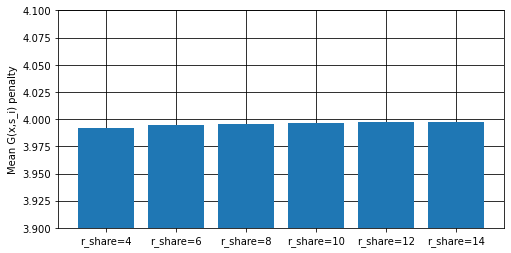

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # Nos sirve para normalizar datos
scaler = preprocessing.MinMaxScaler()

name_file = 'multimodal_radius_study'
df = pd.read_csv('./study/multimodal/'+name_file+'.csv')

radius = [8]
radius_share = [4,6,8,10,12,14]

means_kms = np.array([])
means_niches_kms = np.array([])
means_difference = np.array([])

x = np.array([])

for r in radius:
    select_r = df[df['radius'] == r]
    for rs in radius_share:
        select = select_r[select_r['radius_share'] == r]

        aux = np.array(select['best_solution_km'].to_list())
        means_kms = np.append(means_kms, aux.mean())

        aux = np.array(select['niches_kms'].to_list())
        means_n_km = np.array([])
        for j in range(0,len(aux)):
            s = str(aux[j])
            sl = string_number_list_to_list(string_number_list_to_list(s))
            means_n_km = np.append(means_n_km, sl.mean())
            
        means_niches_kms = np.append(means_niches_kms, means_n_km.mean())
        
        
        means_d = np.array([])
        for j in range(0,len(niches_solutions)):
            ni = niches_solutions[j]
            first = ni[0]
            cost = 0
            for m in range(1,5):
                cost = cost + g(first,ni[m],r,rs,1)
            means_d = np.append(means_d, cost)
        
        means_difference = np.append(means_difference, means_d.mean())
        

        x = np.append(x, f"r_share={rs}")

#print(x)    
print(means_difference)


# PLOT
ax = plt.figure(figsize=(8,4))
ax.set_facecolor('white')
'''
plt.subplot(2,1,1)
plt.bar(x, means_kms, zorder=3)
plt.ylabel("Mean Km")
plt.ylim((500,510))
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
#legend = ['Slots']

plt.subplot(2,1,2)
plt.bar(x, means_niches_kms, color='orange', zorder=3)
plt.ylabel("Mean niches Km")
plt.xlabel("Radius_share Values")
plt.ylim((500,510))
'''

plt.bar(x, means_difference, zorder=3)
plt.ylabel("Mean G(x,s_i) penalty")
plt.ylim((3.9,4.1))
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)

#plt.legend(legend)
# Si queremos que la leyenda este a la derecha
'''
plt.subplots_adjust(right=0.7)
plt.legend(legend, bbox_to_anchor=(1.04,0.5), loc="center left")
'''
plt.grid(axis='both',linestyle='solid', color='k', zorder=0)
plt.savefig('./study/multimodal/radius_'+str(radius[0])+'_difference_study.png', dpi=100)
plt.show()